# Hardware Information

In [1]:
!pip install GPUtil

  Preparing metadata (setup.py) ... - \ done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7393 sha256=f8dfc57a7f06dc34e6aadca7f3eac4e2a005cc36821c7c7ecb9b2b4b9e60eccf
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built GPUtil


In [2]:
import os
import psutil
import platform
import GPUtil

def get_hardware_info():
    info = {}

    # Operating System details
    info['Platform'] = platform.system()
    info['Platform Version'] = platform.version()
    info['Platform Release'] = platform.release()
    info['Machine'] = platform.machine()

    # CPU details
    info['CPU Cores (Logical)'] = psutil.cpu_count(logical=True)
    info['CPU Cores (Physical)'] = psutil.cpu_count(logical=False)
    info['CPU Frequency'] = psutil.cpu_freq().max

    # Memory details
    svmem = psutil.virtual_memory()
    info['Total Memory (GB)'] = svmem.total / (1024 ** 3)

    # Disk details
    info['Total Disk (GB)'] = psutil.disk_usage('/').total / (1024 ** 3)

    # GPU details
    gpus = GPUtil.getGPUs()
    if gpus:
        gpu_info = []
        for gpu in gpus:
            gpu_info.append({
                'GPU Name': gpu.name,
                'GPU Load (%)': gpu.load * 100,
                'GPU Free Memory (MB)': gpu.memoryFree,
                'GPU Used Memory (MB)': gpu.memoryUsed,
                'GPU Total Memory (MB)': gpu.memoryTotal,
                'GPU Temperature (C)': gpu.temperature
            })
        info['GPUs'] = gpu_info
    else:
        info['GPUs'] = 'No GPU available'

    return info

hardware_info = get_hardware_info()
for key, value in hardware_info.items():
    print(f"{key}: {value}")

# Save the hardware info to a text file for documentation purposes
with open('hardware_info.txt', 'w') as file:
    for key, value in hardware_info.items():
        file.write(f"{key}: {value}\n")


Platform: Linux
Platform Version: #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
Platform Release: 6.6.56+
Machine: x86_64
CPU Cores (Logical): 4
CPU Cores (Physical): 2
CPU Frequency: 0.0
Total Memory (GB): 31.350509643554688
Total Disk (GB): 8062.387607574463
GPUs: [{'GPU Name': 'Tesla T4', 'GPU Load (%)': 0.0, 'GPU Free Memory (MB)': 15095.0, 'GPU Used Memory (MB)': 1.0, 'GPU Total Memory (MB)': 15360.0, 'GPU Temperature (C)': 32.0}, {'GPU Name': 'Tesla T4', 'GPU Load (%)': 0.0, 'GPU Free Memory (MB)': 15095.0, 'GPU Used Memory (MB)': 1.0, 'GPU Total Memory (MB)': 15360.0, 'GPU Temperature (C)': 33.0}]


### Loading Datasets

In [3]:
import os
import pandas as pd
# Base directory where your dataset is stored
base_directory = '/kaggle/input/apt-unraveled/Week5_Day6_06272021/Week5_Day6_06272021'

# Exclude Week 1 and list CSV files from Weeks 2 to 6
csv_files = []
for root, dirs, files in os.walk(base_directory):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

# Load all CSV files from relevant weeks
dataframes = [pd.read_csv(file) for file in csv_files]
combined_data = pd.concat(dataframes, ignore_index=True)


# Check label distribution for balance
signature_counts = combined_data['Signature'].value_counts()
print("Signature distribution:")
print(signature_counts)

activity_counts = combined_data['Activity'].value_counts()
print("Activity distribution:")
print(activity_counts)

stage_counts = combined_data['Stage'].value_counts()
print("Stage distribution:")
print(stage_counts)

Signature distribution:
Signature
APT    6148
AA     4466
Name: count, dtype: int64
Activity distribution:
Activity
Normal                                       52620
Active Scanning: Scanning IP Blocks           4462
Encrypted Channel: Symmetric Cryptography     2660
Maintain Access                               2157
Data Transfer Size Limits                     1331
Active Scanning: Vulnerability Scanning          4
Name: count, dtype: int64
Stage distribution:
Stage
Benign                52620
Reconnaissance         4466
Establish Foothold     2660
Lateral Movement       2157
Data Exfiltration      1331
Name: count, dtype: int64


In [4]:
combined_data.shape

(63234, 89)

In [5]:
combined_data.columns

Index(['id', 'expiration_id', 'src_ip', 'src_mac', 'src_oui', 'src_port',
       'dst_ip', 'dst_mac', 'dst_oui', 'dst_port', 'protocol', 'ip_version',
       'vlan_id', 'tunnel_id', 'bidirectional_first_seen_ms',
       'bidirectional_last_seen_ms', 'bidirectional_duration_ms',
       'bidirectional_packets', 'bidirectional_bytes', 'src2dst_first_seen_ms',
       'src2dst_last_seen_ms', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_first_seen_ms', 'dst2src_last_seen_ms',
       'dst2src_duration_ms', 'dst2src_packets', 'dst2src_bytes',
       'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'bidirectional_max_ps', 'src2dst_min_ps',
       'src2dst_mean_ps', 'src2dst_stddev_ps', 'src2dst_max_ps',
       'dst2src_min_ps', 'dst2src_mean_ps', 'dst2src_stddev_ps',
       'dst2src_max_ps', 'bidirectional_min_piat_ms',
       'bidirectional_mean_piat_ms', 'bidirectional_stddev_piat_ms',
       'bidirectional_max_piat_ms', 'src2dst

In [6]:
combined_data.head()

,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,...,application_is_guessed,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type,Activity,Stage,DefenderResponse,Signature
0,0,0,192.168.0.11,fa:16:3e:e6:67:36,fa:16:3e,60689,8.8.8.8,fa:16:3e:b5:c4:4c,fa:16:3e,53,...,0,tile-service.weather.microsoft.com,NaN,NaN,NaN,NaN,Normal,Benign,Benign,NaN
1,1,0,192.168.0.11,fa:16:3e:e6:67:36,fa:16:3e,62264,184.30.179.31,fa:16:3e:b5:c4:4c,fa:16:3e,80,...,0,tile-service.weather.microsoft.com,NaN,NaN,Microsoft-WNS/10.0,text/xml,Normal,Benign,Benign,NaN
2,2,0,192.168.0.11,fa:16:3e:e6:67:36,fa:16:3e,46190,10.8.10.84,fa:16:3e:b5:c4:4c,fa:16:3e,443,...,1,NaN,NaN,NaN,NaN,NaN,Maintain Access,Lateral Movement,Benign,APT
3,3,0,192.168.0.11,fa:16:3e:e6:67:36,fa:16:3e,123,162.159.200.1,fa:16:3e:b5:c4:4c,fa:16:3e,123,...,0,NaN,NaN,NaN,NaN,NaN,Normal,Benign,Benign,NaN
4,4,0,192.168.0.11,fa:16:3e:e6:67:36,fa:16:3e,123,50.205.244.20,fa:16:3e:b5:c4:4c,fa:16:3e,123,...,0,NaN,NaN,NaN,NaN,NaN,Normal,Benign,Benign,NaN


### Chosing Label "Signature".

In [7]:
combined_data['Signature'] = combined_data['Signature'].apply(lambda x: 'APT' if x == 'APT' else 'Non-APT')

# Check the distribution of the new label
print(combined_data['Signature'].value_counts())

Signature
Non-APT    57086
APT         6148
Name: count, dtype: int64


### Droping irrevalent columns.

In [8]:
columns_to_drop = ['id','Activity', 'Stage',
       'DefenderResponse', 'Signature']
# Drop the identified columns from the DataFrame
df_cleaned = combined_data.drop(columns=columns_to_drop)

In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63234 entries, 0 to 63233
Data columns (total 84 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   expiration_id                 63234 non-null  int64  
 1   src_ip                        63234 non-null  object 
 2   src_mac                       63234 non-null  object 
 3   src_oui                       63234 non-null  object 
 4   src_port                      63234 non-null  int64  
 5   dst_ip                        63234 non-null  object 
 6   dst_mac                       63234 non-null  object 
 7   dst_oui                       63234 non-null  object 
 8   dst_port                      63234 non-null  int64  
 9   protocol                      63234 non-null  int64  
 10  ip_version                    63234 non-null  int64  
 11  vlan_id                       63234 non-null  int64  
 12  tunnel_id                     63234 non-null  int64  
 13  b

### Numeric columns

In [10]:
import pandas as pd
import numpy as np

# Assuming df_cleaned is your DataFrame after removing null-valued columns
# Compute correlation matrix
df_numerics = df_cleaned.drop(columns=['src_ip', 'src_mac', 'src_oui', 'src_port', 'dst_ip', 'dst_mac', 'dst_oui', 'application_name', 'application_category_name', 'requested_server_name', 'client_fingerprint', 'server_fingerprint', 'user_agent', 'content_type'])

# Check the shape of the DataFrame after dropping correlated features
print("Shape of DataFrame after dropping correlated features:", df_numerics.shape)

Shape of DataFrame after dropping correlated features: (63234, 70)


In [11]:
df_numerics.head(5)

,expiration_id,dst_port,protocol,ip_version,vlan_id,tunnel_id,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_duration_ms,bidirectional_packets,...,src2dst_fin_packets,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,application_is_guessed
0,0,53,17,4,0,0,1624820683947,1624820683964,17,2,...,0,0,0,0,0,0,0,0,0,0
1,0,80,6,4,0,0,1624820683972,1624820744010,60038,11,...,1,1,0,0,0,5,2,0,1,0
2,0,443,6,4,0,0,1624820685998,1624820686069,71,8,...,1,0,0,0,0,4,1,0,1,1
3,0,123,17,4,0,0,1624820862169,1624820862199,30,2,...,0,0,0,0,0,0,0,0,0,0
4,0,123,17,4,0,0,1624820755441,1624820817154,61713,4,...,0,0,0,0,0,0,0,0,0,0


### Label Encoding to targeted label.

In [12]:
from sklearn.preprocessing import LabelEncoder

# Sample target classes
target_classes = combined_data["Signature"].values

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the target classes
Y = encoder.fit_transform(target_classes)

# Display the encoded target classes
print("Encoded target classes:")
for class_name, encoded_class in zip(encoder.classes_, range(len(encoder.classes_))):
    print(f"{class_name}: {encoded_class}")

# Check the transformed target classes
print("Transformed target classes:")
print(Y)

Encoded target classes:
APT: 0
Non-APT: 1
Transformed target classes:
[1 1 0 ... 1 1 1]


### IP features convertion.

In [13]:
import pandas as pd
import numpy as np
import ipaddress
# import category_encoders as ce

# Sample DataFrame for demonstration
# df_cleaned = pd.read_csv('your_dataset.csv')  # Assuming you load your data this way
non_numeric_columns = ['src_ip', 'src_mac', 'src_oui', 'src_port', 'dst_ip', 'dst_mac', 'dst_oui', 'application_name', 'application_category_name', 'requested_server_name', 'client_fingerprint', 'server_fingerprint', 'user_agent', 'content_type']

# List of non-numeric columns

# Function to validate and convert IP to integer
def validate_and_convert_ip(ip):
    try:
        # Check if it's a valid IPv4 address
        ip = ipaddress.IPv4Address(ip)
        return int(ip) / (2**32 - 1)  # Normalize to the range [0, 1]
    except:
        # Handle both IPv6 and invalid addresses by returning NaN
        return np.nan

# Create a copy of the IP-related columns to avoid modifying the original DataFrame
df_ip = df_cleaned[["src_ip", "dst_ip"]].copy()

# Apply the function to IP columns
df_ip['src_ip'] = df_ip['src_ip'].apply(validate_and_convert_ip)
df_ip['dst_ip'] = df_ip['dst_ip'].apply(validate_and_convert_ip)

# Handle NaN values that may have resulted from invalid IPs
df_ip['src_ip'].fillna(-1, inplace=True)
df_ip['dst_ip'].fillna(-1, inplace=True)

# Combine df_ip back with the other non-numeric columns for encoding
df_non_numeric = df_cleaned[non_numeric_columns].copy()
df_combined = pd.concat([df_ip, df_non_numeric], axis=1)



# Check the resulting dataframe
df_ip

/tmp/ipykernel_25/1390817584.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ip['src_ip'].fillna(-1, inplace=True)
/tmp/ipykernel_25/1390817584.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,src_ip,dst_ip
0,0.752563,0.031373
1,0.752563,0.719218
2,0.752563,0.039185
3,0.752563,0.635251
4,0.752563,0.198455
...,...,...
63229,0.039078,0.937500
63230,0.039078,0.937500
63231,0.039078,0.937500
63232,0.039078,0.937500


### Other non-numeric conversion

In [14]:
import category_encoders as ce

# Opt-in to the future behavior for downcasting
pd.set_option('future.no_silent_downcasting', True)

# Create a DataFrame for non-numeric columns excluding IPs
non_ip_columns = ['src_mac', 'src_oui', 'src_port', 'dst_mac', 'dst_oui', 'application_name', 'application_category_name', 'requested_server_name', 'client_fingerprint', 'server_fingerprint', 'user_agent', 'content_type']

# Select the non-IP non-numeric columns
df_non_numeric = df_cleaned[non_ip_columns].copy()

# Initialize the target encoder
target_encoder = ce.TargetEncoder(cols=non_ip_columns)

# Assuming Y is your target variable
# Y = df_cleaned['target_variable']

# Fit and transform the data
encoded_non_ip = target_encoder.fit_transform(df_non_numeric, Y)

### All features

In [15]:
# Combine the encoded IP and non-IP columns with other numeric features
X = pd.concat([df_ip, encoded_non_ip, df_numerics], axis=1)

# Check the resulting dataframe
X.head()

,src_ip,dst_ip,src_mac,src_oui,src_port,dst_mac,dst_oui,application_name,application_category_name,requested_server_name,...,src2dst_fin_packets,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,application_is_guessed
0,0.752563,0.031373,0.884482,0.902774,0.916565,0.881909,0.872252,1.000000,1.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.752563,0.719218,0.884482,0.902774,0.916565,0.881909,0.872252,1.000000,1.000000,1.000000,...,1,1,0,0,0,5,2,0,1,0
2,0.752563,0.039185,0.884482,0.902774,0.774714,0.881909,0.872252,0.399199,0.665742,0.827763,...,1,0,0,0,0,4,1,0,1,1
3,0.752563,0.635251,0.884482,0.902774,1.000000,0.881909,0.872252,1.000000,1.000000,0.827763,...,0,0,0,0,0,0,0,0,0,0
4,0.752563,0.198455,0.884482,0.902774,1.000000,0.881909,0.872252,1.000000,1.000000,0.827763,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X.shape

(63234, 84)

In [17]:
X.columns

Index(['src_ip', 'dst_ip', 'src_mac', 'src_oui', 'src_port', 'dst_mac',
       'dst_oui', 'application_name', 'application_category_name',
       'requested_server_name', 'client_fingerprint', 'server_fingerprint',
       'user_agent', 'content_type', 'expiration_id', 'dst_port', 'protocol',
       'ip_version', 'vlan_id', 'tunnel_id', 'bidirectional_first_seen_ms',
       'bidirectional_last_seen_ms', 'bidirectional_duration_ms',
       'bidirectional_packets', 'bidirectional_bytes', 'src2dst_first_seen_ms',
       'src2dst_last_seen_ms', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_first_seen_ms', 'dst2src_last_seen_ms',
       'dst2src_duration_ms', 'dst2src_packets', 'dst2src_bytes',
       'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'bidirectional_max_ps', 'src2dst_min_ps',
       'src2dst_mean_ps', 'src2dst_stddev_ps', 'src2dst_max_ps',
       'dst2src_min_ps', 'dst2src_mean_ps', 'dst2src_stddev_ps',
       'dst

### Data Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import ClusterCentroids

scaler = MinMaxScaler()
X_resampled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# under_sampling = ClusterCentroids(random_state=random_state)

# X_resampled, y_resampled = under_sampling.fit_resample(X_scaled, Y)

# print(pd.Series(y_resampled).value_counts())

In [19]:
X_resampled.head()

,src_ip,dst_ip,src_mac,src_oui,src_port,dst_mac,dst_oui,application_name,application_category_name,requested_server_name,...,src2dst_fin_packets,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,application_is_guessed
0,1.0,0.532321,0.784951,0.0,0.664754,0.692016,0.0,1.0,1.0,1.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,1.0,0.887339,0.784951,0.0,0.664754,0.692016,0.0,1.0,1.0,1.0,...,0.166667,0.5,0.0,0.0,0.0,0.001195,0.000834,0.0,0.5,0.0
2,1.0,0.536354,0.784951,0.0,0.094786,0.692016,0.0,0.0,0.0,0.0,...,0.166667,0.0,0.0,0.0,0.0,0.000956,0.000417,0.0,0.5,1.0
3,1.0,0.844000,0.784951,0.0,1.000000,0.692016,0.0,1.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,1.0,0.618557,0.784951,0.0,1.000000,0.692016,0.0,1.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [20]:
X_resampled.shape

(63234, 84)

In [21]:
y_resampled = Y

### Class Distribution

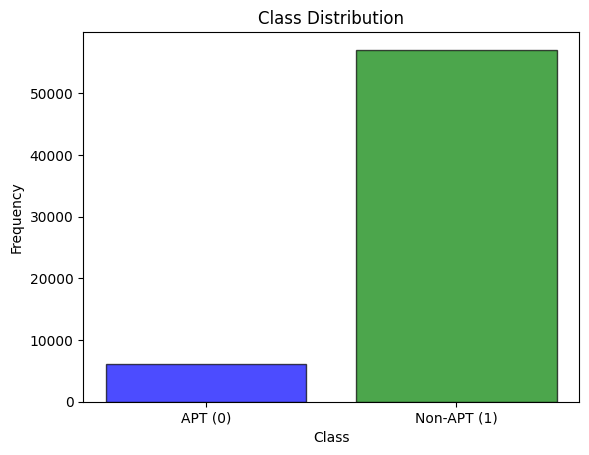

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def plot_class_distribution(Y_resampled):
    classes = ['APT (0)', 'Non-APT (1)']
    counts = np.bincount(Y_resampled)
    
    plt.figure()
    plt.bar(classes, counts, color=['blue', 'green'], edgecolor='k', alpha=0.7)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title('Class Distribution')
    plt.show()

# Assuming Y_resampled_pred is defined
plot_class_distribution(y_resampled)


### Training Model.

In [23]:
from keras.models import Model, load_model
from keras.layers import Input, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

def create_bilstm_cnn_model(input_shape):
    # Input layer
    input_layer = Input(shape=input_shape)

    # Bi-LSTM branch
    lstm_output = LSTM(64, return_sequences=True)(input_layer)
    lstm_output = Dropout(0.5)(lstm_output)
    lstm_output = LSTM(32)(lstm_output)
    lstm_output = Dropout(0.5)(lstm_output)

    # CNN branch
    cnn_output = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
    cnn_output = MaxPooling1D(pool_size=2)(cnn_output)
    cnn_output = Flatten()(cnn_output)
    cnn_output = Dense(32, activation='relu')(cnn_output)
    cnn_output = Dropout(0.5)(cnn_output)

    # Combine LSTM and CNN branches
    combined = Concatenate()([lstm_output, cnn_output])
    combined = Dense(64, activation='relu')(combined)
    combined = Dropout(0.3)(combined)
    output = Dense(1, activation='sigmoid')(combined)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Reshape data
X_resampled_np = X_resampled.to_numpy()
X_resampled_np = np.expand_dims(X_resampled_np, axis=2)  # Reshape to (samples, timesteps, features)
n_samples, n_timesteps, n_features = X_resampled_np.shape

# Define cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store results
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []
histories = []
best_accuracy = 0
best_history = None

# Training and evaluation
for train_index, val_index in kf.split(X_resampled):
    X_train, X_val = X_resampled_np[train_index], X_resampled_np[val_index]
    Y_train, Y_val = y_resampled[train_index], y_resampled[val_index]

    # Create and compile the model
    model = create_bilstm_cnn_model((n_timesteps, n_features))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()

    # Define the checkpoint callback to save the best model during training
    checkpoint_path = '/kaggle/working/best_model.keras'
    checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', save_weights_only=False)

    # Training the model
    history = model.fit(
        X_train, Y_train,
        epochs=20,
        batch_size=32,
        validation_data=(X_val, Y_val),
        callbacks=[EarlyStopping(patience=5), checkpoint]
    )
    
    histories.append(history)

    # Load the best model
    best_model = load_model(checkpoint_path)
    
    ## New added
    # Evaluate the best model on the validation data
    results = best_model.evaluate(X_val, Y_val, verbose=0)
    accuracy = results[1]
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_history = history
        
    accuracy_scores.append(accuracy)
    ## New added

    # Evaluate the best model on the validation data
    # results = best_model.evaluate(X_val, Y_val, verbose=0)
    # accuracy_scores.append(results[1])

    # Predictions
    Y_pred = best_model.predict(X_val)
    Y_pred = (Y_pred > 0.5).astype(int)

    # Calculate precision, recall, and f1-score
    precision = precision_score(Y_val, Y_pred)
    recall = recall_score(Y_val, Y_pred)
    f1 = f1_score(Y_val, Y_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)




2025-01-23 15:52:31.940052: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-23 15:52:31.940189: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-23 15:52:32.071611: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 84, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 82, 64)    │        256 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 84, 64)    │     16,896 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 41, 64)    │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 84, 64)    │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 2624)      │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 32)        │     12,416 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │     84,000 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 32)        │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64)        │          0 │ dropout_1[0][0],  │
│ (Concatenate)       │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      4,160 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 117,793 (460.13 KB)

 Trainable params: 117,793 (460.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9682 - loss: 0.0783 - val_accuracy: 0.9999 - val_loss: 6.2787e-04
Epoch 2/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9982 - loss: 0.0059 - val_accuracy: 0.9999 - val_loss: 2.8507e-04
Epoch 3/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9987 - loss: 0.0041 - val_accuracy: 0.9999 - val_loss: 2.3193e-04
Epoch 4/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9999 - val_loss: 1.2144e-04
Epoch 5/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9980 - loss: 0.0055 - val_accuracy: 0.9999 - val_loss: 4.1154e-04
Epoch 6/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9979 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 1.7028e-04
Epoch 7/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9972 - loss: 0.0068 - val_accuracy: 0.9999 - val_loss: 1.1105e-04
Epoch 8/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 84, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 82, 64)    │        256 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 84, 64)    │     16,896 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 41, 64)    │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 84, 64)    │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 2624)      │          0 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 32)        │     12,416 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │     84,000 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 32)        │          0 │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 32)        │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 64)        │          0 │ dropout_5[0][0],  │
│ (Concatenate)       │                   │            │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      4,160 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 64)        │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         65 │ dropout_7[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 117,793 (460.13 KB)

 Trainable params: 117,793 (460.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9840 - loss: 0.0471 - val_accuracy: 0.9999 - val_loss: 3.0620e-04
Epoch 2/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9995 - loss: 0.0036 - val_accuracy: 0.9999 - val_loss: 1.1905e-04
Epoch 3/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9999 - val_loss: 8.0545e-05
Epoch 4/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9998 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 7.1518e-06
Epoch 5/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9997 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 1.1262e-05
Epoch 6/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9998 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 9.3749e-07
Epoch 7/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9997 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 4.9577e-06
Epoch 8/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 84, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 82, 64)    │        256 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 84, 64)    │     16,896 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 41, 64)    │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 84, 64)    │          0 │ lstm_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 2624)      │          0 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 32)        │     12,416 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 32)        │     84,000 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 32)        │          0 │ lstm_5[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 32)        │          0 │ dense_6[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 64)        │          0 │ dropout_9[0][0],  │
│ (Concatenate)       │                   │            │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │      4,160 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 64)        │          0 │ dense_7[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │         65 │ dropout_11[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 117,793 (460.13 KB)

 Trainable params: 117,793 (460.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9751 - loss: 0.0784 - val_accuracy: 0.9998 - val_loss: 0.0011
Epoch 2/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9966 - loss: 0.0143 - val_accuracy: 0.9998 - val_loss: 6.2333e-04
Epoch 3/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9962 - loss: 0.0151 - val_accuracy: 0.9999 - val_loss: 2.4318e-04
Epoch 4/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9962 - loss: 0.0151 - val_accuracy: 1.0000 - val_loss: 3.4802e-04
Epoch 5/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9958 - loss: 0.0147 - val_accuracy: 1.0000 - val_loss: 1.8869e-04
Epoch 6/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9957 - loss: 0.0138 - val_accuracy: 1.0000 - val_loss: 5.5863e-05
Epoch 7/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9971 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 1.8021e-05
Epoch 8/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/s

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 84, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 82, 64)    │        256 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ (None, 84, 64)    │     16,896 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 41, 64)    │          0 │ conv1d_3[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 84, 64)    │          0 │ lstm_6[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 2624)      │          0 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ (None, 32)        │     12,416 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 32)        │     84,000 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 32)        │          0 │ lstm_7[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 32)        │          0 │ dense_9[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 64)        │          0 │ dropout_13[0][0], │
│ (Concatenate)       │                   │            │ dropout_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 64)        │      4,160 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 64)        │          0 │ dense_10[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │         65 │ dropout_15[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 117,793 (460.13 KB)

 Trainable params: 117,793 (460.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9860 - loss: 0.0469 - val_accuracy: 1.0000 - val_loss: 4.0332e-06
Epoch 2/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 1.2442e-05
Epoch 3/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 5.1820e-08
Epoch 4/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 6.5109e-07
Epoch 5/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 5.2664e-08
Epoch 6/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 1.0000 - loss: 3.7258e-04 - val_accuracy: 1.0000 - val_loss: 2.8382e-06
Epoch 7/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9998 - loss: 8.9422e-04 - val_accuracy: 1.0000 - val_loss: 8.6649e-08
Epoch 8/20
1581/1581 ━━━━━━━━━━━━━━━━━━━

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 84, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 82, 64)    │        256 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_8 (LSTM)       │ (None, 84, 64)    │     16,896 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_4     │ (None, 41, 64)    │          0 │ conv1d_4[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 84, 64)    │          0 │ lstm_8[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 2624)      │          0 │ max_pooling1d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_9 (LSTM)       │ (None, 32)        │     12,416 │ dropout_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 32)        │     84,000 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 32)        │          0 │ lstm_9[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 32)        │          0 │ dense_12[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 64)        │          0 │ dropout_17[0][0], │
│ (Concatenate)       │                   │            │ dropout_18[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │      4,160 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 64)        │          0 │ dense_13[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 1)         │         65 │ dropout_19[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 117,793 (460.13 KB)

 Trainable params: 117,793 (460.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9853 - loss: 0.0475 - val_accuracy: 0.9998 - val_loss: 0.0024
Epoch 2/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9997 - loss: 0.0014 - val_accuracy: 0.9998 - val_loss: 0.0019
Epoch 3/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9996 - loss: 0.0013 - val_accuracy: 0.9998 - val_loss: 0.0031
Epoch 4/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9994 - loss: 0.0018 - val_accuracy: 0.9997 - val_loss: 0.0023
Epoch 5/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9994 - loss: 0.0017 - val_accuracy: 0.9997 - val_loss: 0.0019
Epoch 6/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9994 - loss: 0.0014 - val_accuracy: 0.9998 - val_loss: 0.0025
Epoch 7/20
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9998 - val_loss: 0.0027
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


### Calculate and print average results

In [24]:
# Calculate mean metrics across all folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1_score = np.mean(f1_scores)

# Print the results
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Mean Precision: {mean_precision:.4f}')
print(f'Mean Recall: {mean_recall:.4f}')
print(f'Mean F1-Score: {mean_f1_score:.4f}')

# Save the best model for future use
final_model_path = '/kaggle/working/final_best_model.keras'
# autoencoder.save('/kaggle/working/autoencoder_model.keras')
best_model.save(final_model_path)

Mean Accuracy: 1.0000
Mean Precision: 0.9999
Mean Recall: 1.0000
Mean F1-Score: 1.0000


### Model Architecture

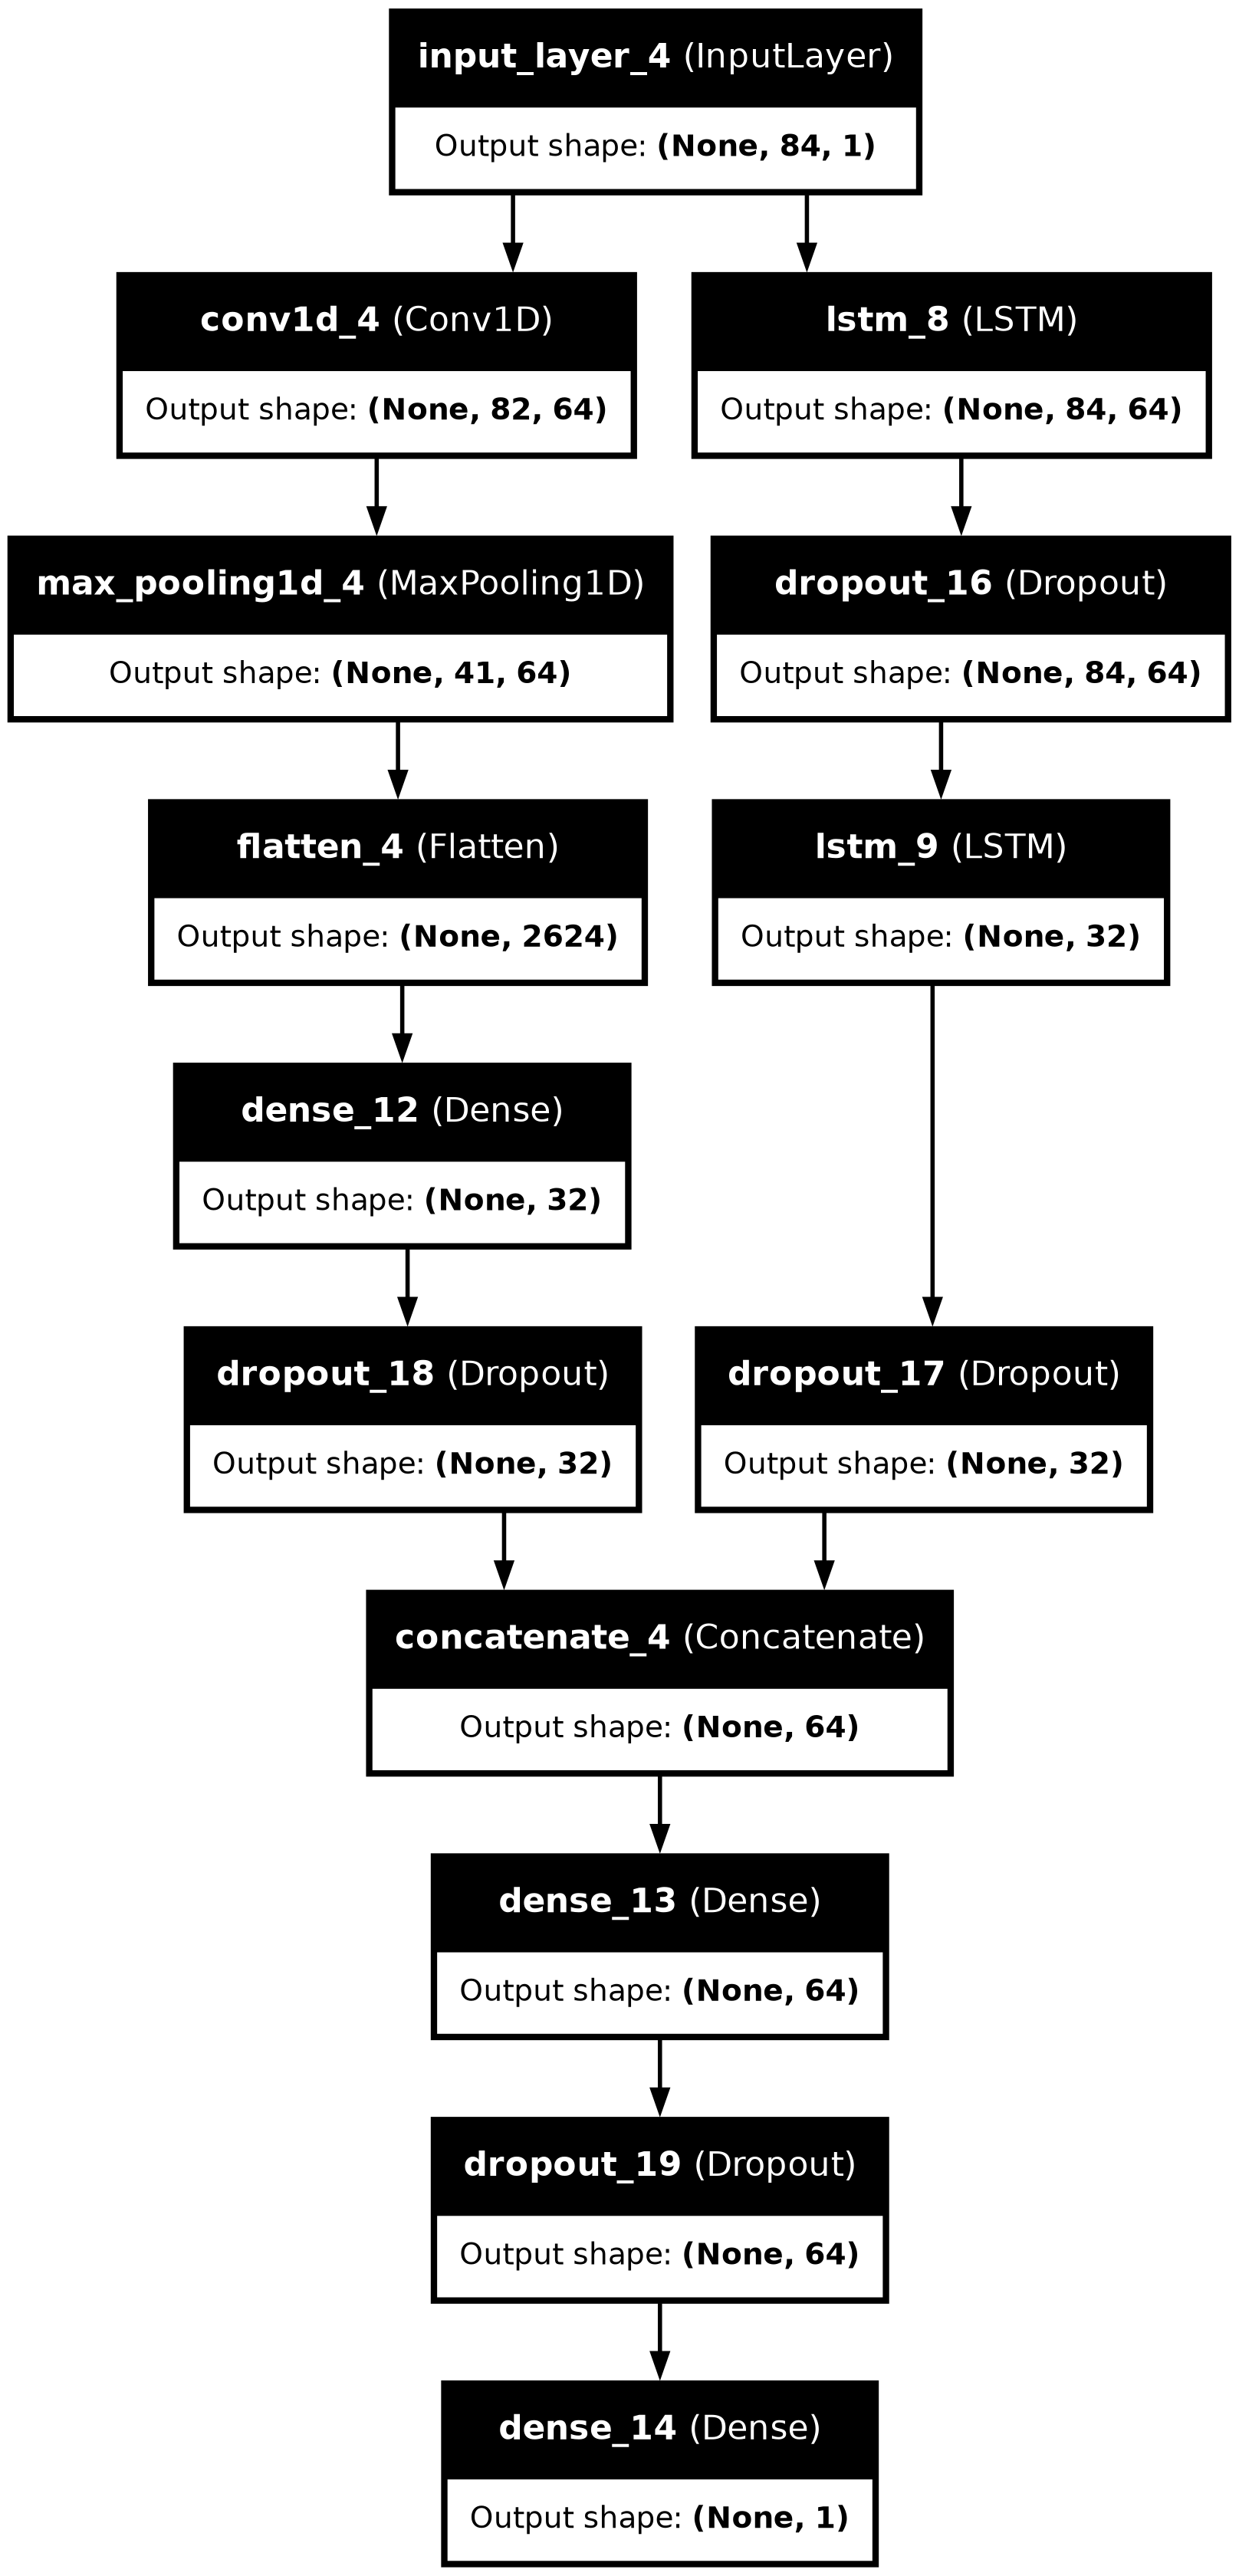

In [25]:
from keras.utils import plot_model
# Visualize the model architecture
plot_model(best_model, to_file='/kaggle/working/model_architecture.png', show_shapes=True, show_layer_names=True)

### CNN, Bi-LSTM model

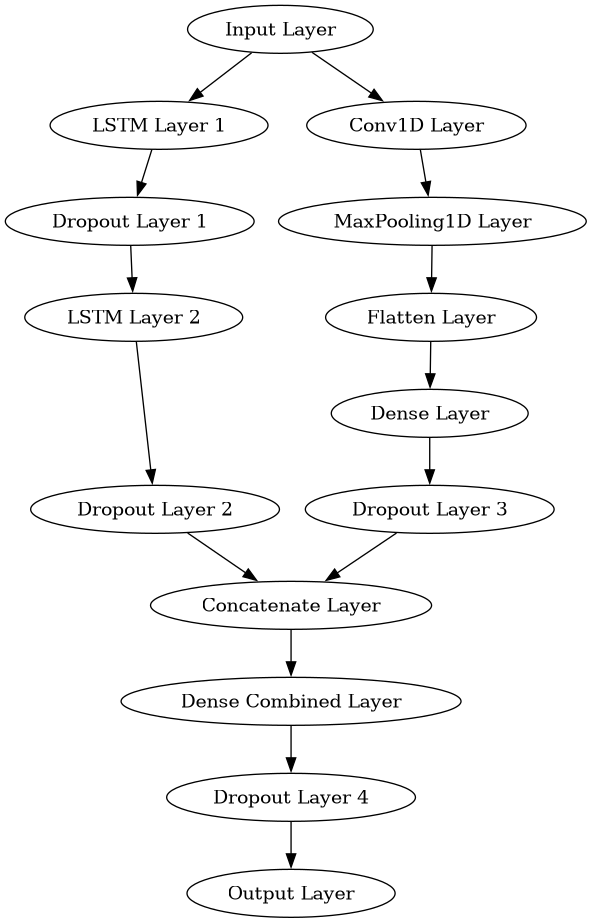

In [26]:
from graphviz import Digraph
from IPython.display import Image

# Create a new Digraph object
dot = Digraph(comment='BiLSTM-CNN Model')

# Adding nodes for each layer
dot.node('A', 'Input Layer')

# LSTM Branch
dot.node('B', 'LSTM Layer 1')
dot.node('C', 'Dropout Layer 1')
dot.node('D', 'LSTM Layer 2')
dot.node('E', 'Dropout Layer 2')

# CNN Branch
dot.node('F', 'Conv1D Layer')
dot.node('G', 'MaxPooling1D Layer')
dot.node('H', 'Flatten Layer')
dot.node('I', 'Dense Layer')
dot.node('J', 'Dropout Layer 3')

# Combining Branch
dot.node('K', 'Concatenate Layer')
dot.node('L', 'Dense Combined Layer')
dot.node('M', 'Dropout Layer 4')
dot.node('N', 'Output Layer')

# Adding edges for LSTM Branch
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('C', 'D')
dot.edge('D', 'E')

# Adding edges for CNN Branch
dot.edge('A', 'F')
dot.edge('F', 'G')
dot.edge('G', 'H')
dot.edge('H', 'I')
dot.edge('I', 'J')

# Adding edges for Combining Branch
dot.edge('E', 'K')
dot.edge('J', 'K')
dot.edge('K', 'L')
dot.edge('L', 'M')
dot.edge('M', 'N')

# Render the diagram and save as PNG
file_path = 'bilstm_cnn_model'
dot.render(file_path, format='png')

# Display the image in the notebook
Image(filename=file_path + '.png')

### Visualizing Training History

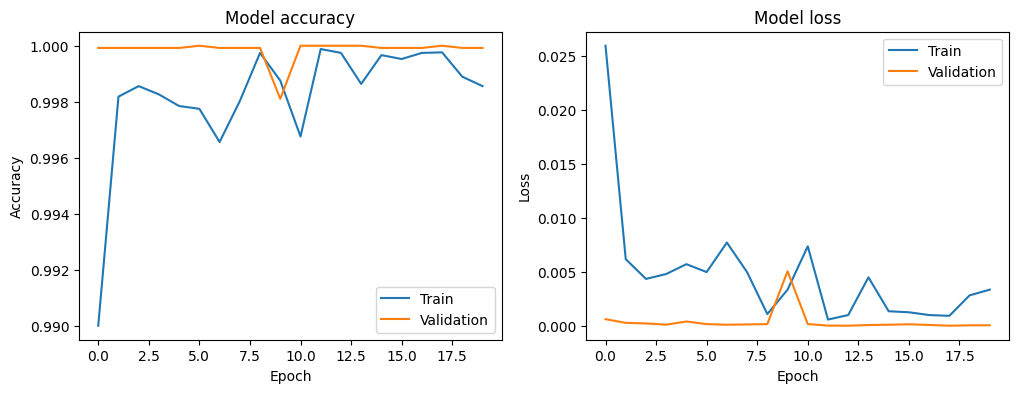

In [27]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy and loss for the best model
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(best_history.history['accuracy'])
plt.plot(best_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(best_history.history['loss'])
plt.plot(best_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()


Hyper parameter tuning

## Skip!!

In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

# Train the model with callbacks
history = model.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, Y_val),
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)


Epoch 1/50
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9997 - loss: 0.0014 - val_accuracy: 0.9997 - val_loss: 0.0029 - learning_rate: 0.0010
Epoch 2/50
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9993 - loss: 0.0023 - val_accuracy: 0.9997 - val_loss: 0.0026 - learning_rate: 0.0010
Epoch 3/50
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9998 - val_loss: 0.0021 - learning_rate: 0.0010
Epoch 4/50
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9994 - loss: 0.0019 - val_accuracy: 0.9998 - val_loss: 0.0025 - learning_rate: 0.0010
Epoch 5/50
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9993 - loss: 0.0021 - val_accuracy: 0.9997 - val_loss: 0.0031 - learning_rate: 0.0010
Epoch 6/50
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9998 - val_loss: 0.0033 - learning_rate: 0.0010
Epoch 7/50
1581/1581 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accura

### Done with training with Bi-LSTM

# Prediction begins

### Importing test dataset

In [29]:
# Base directory where your dataset is stored
dataframe = pd.read_csv('/kaggle/input/test-apt-unraveled/netgw_Flow_labeled_w5_d4.csv')



# Check label distribution for balance
signature_counts = dataframe['Signature'].value_counts()
print("Signature distribution:")
print(signature_counts)

activity_counts = dataframe['Activity'].value_counts()
print("Activity distribution:")
print(activity_counts)

stage_counts = dataframe['Stage'].value_counts()
print("Stage distribution:")
print(stage_counts)


Signature distribution:
Signature
APT    2921
Name: count, dtype: int64
Activity distribution:
Activity
Normal                                       32934
Maintain Access                               2914
Encrypted Channel: Symmetric Cryptography        7
Name: count, dtype: int64
Stage distribution:
Stage
Benign                32934
Lateral Movement       2914
Establish Foothold        7
Name: count, dtype: int64


### Data Shape

In [30]:
dataframe.shape

(35855, 89)

In [31]:
dataframe['Signature'] = dataframe['Signature'].apply(lambda x: 'APT' if x == 'APT' else 'Non-APT')

# Check the distribution of the new label
print(dataframe['Signature'].value_counts())

Signature
Non-APT    32934
APT         2921
Name: count, dtype: int64


### Signature test encoding

In [32]:
from sklearn.preprocessing import LabelEncoder

# Sample target classes
target_classes = dataframe["Signature"].values

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the target classes
Y_pred = encoder.fit_transform(target_classes)

# Display the encoded target classes
print("Encoded target classes:")
for class_name, encoded_class in zip(encoder.classes_, range(len(encoder.classes_))):
    print(f"{class_name}: {encoded_class}")

# Check the transformed target classes
print("Transformed target classes:")
print(Y_pred)

Encoded target classes:
APT: 0
Non-APT: 1
Transformed target classes:
[1 1 1 ... 0 1 1]


### Class Distribution

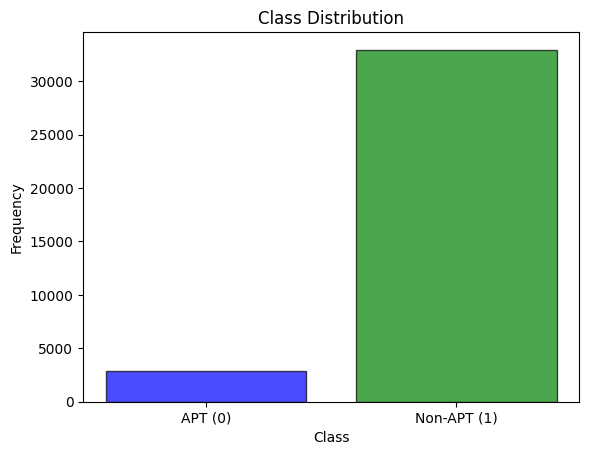

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def plot_class_distribution(Y_resampled_pred):
    classes = ['APT (0)', 'Non-APT (1)']
    counts = np.bincount(Y_resampled_pred)
    
    plt.figure()
    plt.bar(classes, counts, color=['blue', 'green'], edgecolor='k', alpha=0.7)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title('Class Distribution')
    plt.show()

# Assuming Y_resampled_pred is defined
plot_class_distribution(Y_pred)


### selecting numeric data

In [34]:
import pandas as pd
import numpy as np

# Assuming df_cleaned is your DataFrame after removing null-valued columns
# Compute correlation matrix
df_numerics_pred = dataframe.drop(columns=['id','src_ip', 'src_mac', 'src_oui', 'src_port', 'dst_ip', 'dst_mac', 'dst_oui', 'application_name', 'application_category_name', 'requested_server_name', 'client_fingerprint', 'server_fingerprint', 'user_agent', 'content_type','Activity', 'Stage','DefenderResponse','Signature'])

# Check the shape of the DataFrame after dropping correlated features
print("Shape of DataFrame after dropping correlated features:", df_numerics_pred.shape)

Shape of DataFrame after dropping correlated features: (35855, 70)


In [35]:
df_numerics_pred.columns

Index(['expiration_id', 'dst_port', 'protocol', 'ip_version', 'vlan_id',
       'tunnel_id', 'bidirectional_first_seen_ms',
       'bidirectional_last_seen_ms', 'bidirectional_duration_ms',
       'bidirectional_packets', 'bidirectional_bytes', 'src2dst_first_seen_ms',
       'src2dst_last_seen_ms', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_first_seen_ms', 'dst2src_last_seen_ms',
       'dst2src_duration_ms', 'dst2src_packets', 'dst2src_bytes',
       'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'bidirectional_max_ps', 'src2dst_min_ps',
       'src2dst_mean_ps', 'src2dst_stddev_ps', 'src2dst_max_ps',
       'dst2src_min_ps', 'dst2src_mean_ps', 'dst2src_stddev_ps',
       'dst2src_max_ps', 'bidirectional_min_piat_ms',
       'bidirectional_mean_piat_ms', 'bidirectional_stddev_piat_ms',
       'bidirectional_max_piat_ms', 'src2dst_min_piat_ms',
       'src2dst_mean_piat_ms', 'src2dst_stddev_piat_ms', 'src2dst_max_piat

### working on IP

In [36]:
# Function to validate and convert IP to integer
def validate_and_convert_ip(ip):
    try:
        # Check if it's a valid IPv4 address
        ip = ipaddress.IPv4Address(ip)
        return int(ip) / (2**32 - 1)  # Normalize to the range [0, 1]
    except:
        # Handle both IPv6 and invalid addresses by returning NaN
        return np.nan

# Create a copy of the IP-related columns to avoid modifying the original DataFrame
df_ip_pred = dataframe[["src_ip", "dst_ip"]].copy()

# Apply the function to IP columns
df_ip_pred['src_ip'] = df_ip_pred['src_ip'].apply(validate_and_convert_ip)
df_ip_pred['dst_ip'] = df_ip_pred['dst_ip'].apply(validate_and_convert_ip)

# Handle NaN values that may have resulted from invalid IPs
df_ip_pred['src_ip'].fillna(-1, inplace=True)
df_ip_pred ['dst_ip'].fillna(-1, inplace=True)

# Combine df_ip back with the other non-numeric columns for encoding
df_non_numeric = df_cleaned[non_numeric_columns].copy()
df_combined = pd.concat([df_ip, df_non_numeric], axis=1)



# Check the resulting dataframe
df_ip_pred 

/tmp/ipykernel_25/2628416595.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ip_pred['src_ip'].fillna(-1, inplace=True)
/tmp/ipykernel_25/2628416595.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,src_ip,dst_ip
0,0.752563,0.151935
1,0.752563,0.635251
2,0.752563,0.675187
3,0.752563,0.031373
4,0.752563,0.635251
...,...,...
35850,0.752563,0.031372
35851,0.752563,0.390952
35852,0.752563,0.039185
35853,0.752563,0.031373


### for non-IP

In [37]:
# Create a DataFrame for non-numeric columns excluding IPs
non_ip_columns = ['src_mac', 'src_oui', 'src_port', 'dst_mac', 'dst_oui', 'application_name', 'application_category_name', 'requested_server_name', 'client_fingerprint', 'server_fingerprint', 'user_agent', 'content_type']


# Select the non-IP non-numeric columns
df_non_numeric = dataframe[non_ip_columns].copy()

# Initialize the target encoder
target_encoder = ce.TargetEncoder(cols=non_ip_columns)

# Assuming Y is your target variable
# Y = df_cleaned['target_variable']

# Fit and transform the data
encoded_non_ip = target_encoder.fit_transform(df_non_numeric, Y_pred)

### Predicted data prepare

In [38]:
# Combine the encoded IP and non-IP columns with other numeric features
X_pred = pd.concat([df_ip_pred , encoded_non_ip, df_numerics_pred], axis=1)

# Check the resulting dataframe
X_pred.head()

,src_ip,dst_ip,src_mac,src_oui,src_port,dst_mac,dst_oui,application_name,application_category_name,requested_server_name,...,src2dst_fin_packets,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,application_is_guessed
0,0.752563,0.151935,0.909077,0.918533,1.000000,0.906674,0.906722,1.000000,1.000000,0.784746,...,0,0,0,0,0,0,0,0,0,0
1,0.752563,0.635251,0.909077,0.918533,1.000000,0.906674,0.906722,1.000000,1.000000,0.784746,...,0,0,0,0,0,0,0,0,0,0
2,0.752563,0.675187,0.909077,0.918533,0.929133,0.906674,0.906722,0.998535,0.699578,0.784746,...,1,0,0,0,0,3,1,0,1,1
3,0.752563,0.031373,0.909077,0.918533,1.000000,0.906674,0.906722,1.000000,1.000000,0.784746,...,0,0,0,0,0,0,0,0,0,0
4,0.752563,0.635251,0.909077,0.918533,1.000000,0.906674,0.906722,1.000000,1.000000,0.784746,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X_pred.shape

(35855, 84)

### Scaling data.

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_resampled_pred = pd.DataFrame(scaler.fit_transform(X_pred), columns=X_pred.columns)


Y_resampled_pred = Y_pred

print(pd.Series(Y_resampled_pred).value_counts())
X_pred.shape

1    32934
0     2921
Name: count, dtype: int64


(35855, 84)

### Reshaping for LSTM

In [41]:
import numpy as np


X_pred_lstm = X_resampled_pred.to_numpy()
X_test_np_flat = X_pred_lstm.reshape((X_pred_lstm.shape[0], -1))

# # Step 2: Encode the test data using the trained encoder
# X_test_encoded = autoencoder.predict(X_test_np_flat)
# X_test_encoded = X_test_encoded.reshape((X_test_encoded.shape[0], X_test_encoded.shape[1], 1))  # Reshape for LSTM


# Display the new shapes
print(f"Training set reshaped for LSTM: {X_resampled_pred.shape}")

Training set reshaped for LSTM: (35855, 84)


### Predictions

In [42]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 84, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 82, 64)    │        256 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_8 (LSTM)       │ (None, 84, 64)    │     16,896 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_4     │ (None, 41, 64)    │          0 │ conv1d_4[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 84, 64)    │          0 │ lstm_8[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 2624)      │          0 │ max_pooling1d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_9 (LSTM)       │ (None, 32)        │     12,416 │ dropout_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 32)        │     84,000 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 32)        │          0 │ lstm_9[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 32)        │          0 │ dense_12[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 64)        │          0 │ dropout_17[0][0], │
│ (Concatenate)       │                   │            │ dropout_18[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │      4,160 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 64)        │          0 │ dense_13[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 1)         │         65 │ dropout_19[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 353,381 (1.35 MB)

 Trainable params: 117,793 (460.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,588 (920.27 KB)

In [43]:
X_pred_lstm.shape

(35855, 84)

### Prediction on test dataset

In [44]:
# Make predictions

X_pred_lstm = X_pred_lstm.reshape((X_pred_lstm.shape[0], X_pred_lstm.shape[1], 1))

Y_pred_lstm = best_model.predict(X_pred_lstm)

# Convert probabilities to binary labels
Y_pred_binary = (Y_pred_lstm > 0.5).astype(int)

# Display the predictions
print(Y_pred_binary)


1121/1121 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
[[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [1]]


### Evaluation

Accuracy: 0.9997
Precision: 0.9997
Recall: 1.0000
F1-Score: 0.9999
Confusion Matrix:
[[ 2912     9]
 [    0 32934]]


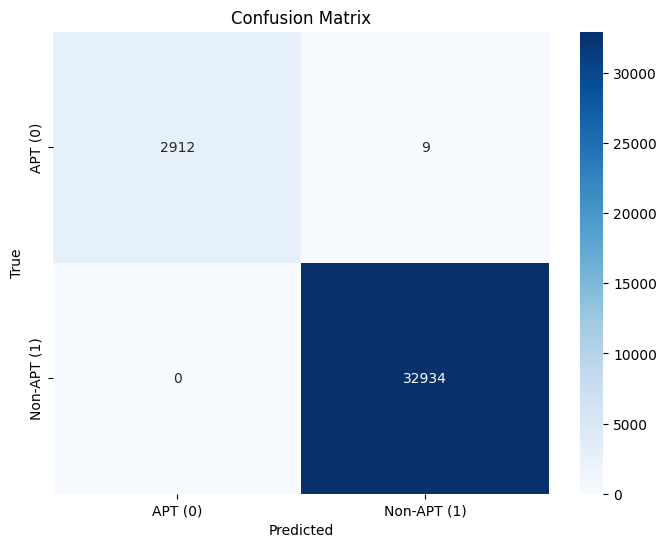

In [45]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'y_test' contains the true labels for the test data
# Ensure y_test is available; it should be the labels of your test dataset

# 1. Make Predictions
# Y_pred_lstm = model.predict(X_pred_lstm)
# Y_predicted_classes = (Y_pred_lstm > 0.5).astype(int).flatten()

# 2. Calculate Evaluation Metrics
accuracy = accuracy_score(Y_resampled_pred, Y_pred_binary )
precision = precision_score(Y_resampled_pred, Y_pred_binary )
recall = recall_score(Y_resampled_pred, Y_pred_binary )
f1 = f1_score(Y_resampled_pred, Y_pred_binary )
conf_matrix = confusion_matrix(Y_resampled_pred, Y_pred_binary )

# 3. Print Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Plot the confusion matrix for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['APT (0)', 'Non-APT (1)'], yticklabels=['APT (0)', 'Non-APT (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Summary Chart

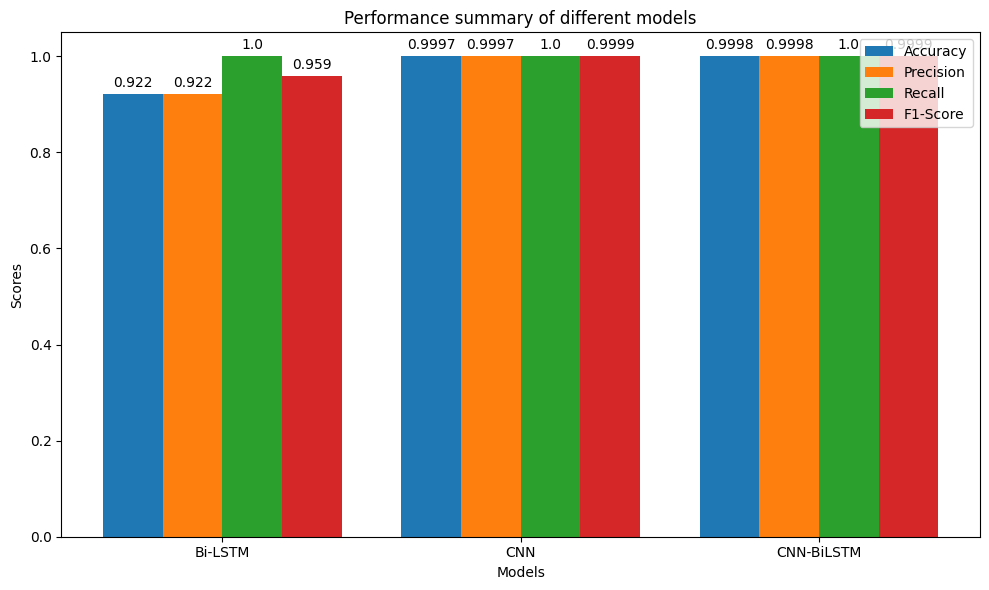

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
models = ['Bi-LSTM', 'CNN', 'CNN-BiLSTM']
accuracy = [0.9220, 0.9997, 0.9998]  # Replace with actual values
precision = [0.9220, 0.9997, 0.9998]  # Replace with actual values
recall = [1.0, 1.0, 1.0]  # Replace with actual values
f1_score = [0.9590, 0.9999, 0.9999]  # Replace with actual values

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_score, width, label='F1-Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance summary of different models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to add labels on the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to the bars
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

fig.tight_layout()

# Save and display the plot
plt.savefig('performance_summary_chart.png')
plt.show()


### Precision-Recall Curve

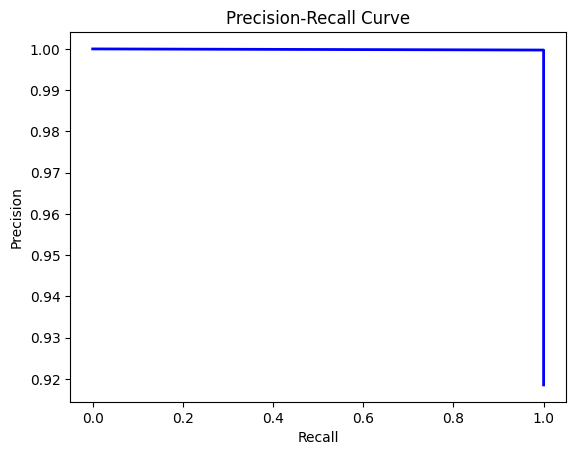

In [47]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def plot_precision_recall_curve(Y_resampled_pred, Y_pred_proba):
    precision, recall, _ = precision_recall_curve(Y_resampled_pred, Y_pred_proba)
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

# Assuming Y_resampled_pred and Y_pred_proba are defined
plot_precision_recall_curve(Y_resampled_pred, Y_pred_binary)


### Error Analysis.

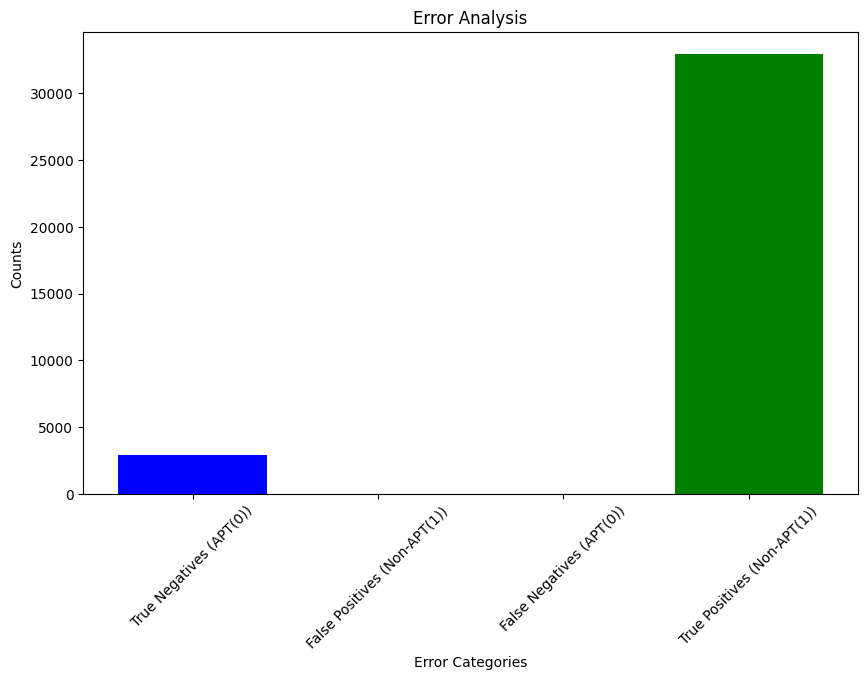

In [48]:
import matplotlib.pyplot as plt

# Define the labels
labels = ['True Negatives (APT(0))', 'False Positives (Non-APT(1))', 
          'False Negatives (APT(0))', 'True Positives (Non-APT(1))']

# Extract values from the confusion matrix
conf_matrix_values = [conf_matrix[0, 0], conf_matrix[0, 1], 
                      conf_matrix[1, 0], conf_matrix[1, 1]]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, conf_matrix_values, color=['blue', 'red', 'orange', 'green'])
plt.xlabel('Error Categories')
plt.ylabel('Counts')
plt.title('Error Analysis')
plt.xticks(rotation=45)
plt.show()


### Display output

In [49]:
import numpy as np
import pandas as pd

# Sample predictions, replace with your actual data
Y_resampled_pred = np.random.randint(0, 2, size=(100, 1))  # Replace with Ground truth
Y_pred_binary = np.random.randint(0, 2, size=(100, 1))     # Replace with actual predictions

# Ensure predictions are 1-dimensional
if Y_resampled_pred.ndim > 1:
    Y_resampled_pred = Y_resampled_pred.flatten()

if Y_pred_binary.ndim > 1:
    Y_pred_binary = Y_pred_binary.flatten()

# Create a DataFrame to display predictions
results_df = pd.DataFrame({'Actual': Y_resampled_pred, 'Predicted': Y_pred_binary})

# Map the labels for better readability
results_df['Actual'] = results_df['Actual'].map({0: 'APT', 1: 'Non-APT'})
results_df['Predicted'] = results_df['Predicted'].map({0: 'APT', 1: 'Non-APT'})

# Display the first few rows
results_df.head()


,Actual,Predicted
0,APT,Non-APT
1,Non-APT,Non-APT
2,APT,Non-APT
3,Non-APT,APT
4,APT,Non-APT


### Display in data

In [50]:
df_droped = dataframe.drop(columns=['id','Activity', 'Stage','DefenderResponse','Signature'])


frames = [df_droped, results_df]

output_df = pd.concat(frames)
output_df


,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,protocol,...,application_name,application_category_name,application_is_guessed,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type,Actual,Predicted
0,0.0,192.168.0.11,fa:16:3e:e6:67:36,fa:16:3e,123.0,38.229.60.9,fa:16:3e:b5:c4:4c,fa:16:3e,123.0,17.0,...,NTP,System,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,192.168.0.11,fa:16:3e:e6:67:36,fa:16:3e,123.0,162.159.200.123,fa:16:3e:b5:c4:4c,fa:16:3e,123.0,17.0,...,NTP.Cloudflare,System,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,192.168.0.11,fa:16:3e:e6:67:36,fa:16:3e,55810.0,172.217.14.99,fa:16:3e:b5:c4:4c,fa:16:3e,443.0,6.0,...,TLS.Google,Web,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,192.168.0.11,fa:16:3e:e6:67:36,fa:16:3e,0.0,8.8.8.8,fa:16:3e:b5:c4:4c,fa:16:3e,0.0,1.0,...,ICMP.Google,Network,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,192.168.0.11,fa:16:3e:e6:67:36,fa:16:3e,123.0,162.159.200.123,fa:16:3e:b5:c4:4c,fa:16:3e,123.0,17.0,...,NTP.Cloudflare,System,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APT,APT
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APT,Non-APT
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APT,APT
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APT,Non-APT


### On Week 6

In [51]:
# Base directory where your dataset is stored
dataframe = pd.read_csv('/kaggle/input/apt-unraveled/Week6_Day2_06292021/Week6_Day2_06292021/net1013x_Flow_labeled.csv')



# Check label distribution for balance
signature_counts = dataframe['Signature'].value_counts()
print("Signature distribution:")
print(signature_counts)

activity_counts = dataframe['Activity'].value_counts()
print("Activity distribution:")
print(activity_counts)

stage_counts = dataframe['Stage'].value_counts()
print("Stage distribution:")
print(stage_counts)

Signature distribution:
Signature
APT    8051
Name: count, dtype: int64
Activity distribution:
Activity
Normal                                       62249
Encrypted Channel: Symmetric Cryptography     5780
Data Transfer Size Limits                     2253
Remote System Discovery                         18
Name: count, dtype: int64
Stage distribution:
Stage
Benign                62249
Establish Foothold     5780
Data Exfiltration      2253
Lateral Movement         18
Name: count, dtype: int64


### Targeted label

In [52]:
dataframe['Signature'] = dataframe['Signature'].apply(lambda x: 'APT' if x == 'APT' else 'Non-APT')

# Check the distribution of the new label
print(dataframe['Signature'].value_counts())

Signature
Non-APT    62249
APT         8051
Name: count, dtype: int64


### Encoding label

In [53]:
from sklearn.preprocessing import LabelEncoder

# Sample target classes
target_classes = dataframe["Signature"].values

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the target classes
Y_pred = encoder.fit_transform(target_classes)

# Display the encoded target classes
print("Encoded target classes:")
for class_name, encoded_class in zip(encoder.classes_, range(len(encoder.classes_))):
    print(f"{class_name}: {encoded_class}")

# Check the transformed target classes
print("Transformed target classes:")
print(Y_pred)

Encoded target classes:
APT: 0
Non-APT: 1
Transformed target classes:
[0 0 0 ... 1 1 0]


### Numerics

In [54]:
import pandas as pd
import numpy as np

# Assuming df_cleaned is your DataFrame after removing null-valued columns
# Compute correlation matrix
df_numerics_pred = dataframe.drop(columns=['id','src_ip', 'src_mac', 'src_oui', 'src_port', 'dst_ip', 'dst_mac', 'dst_oui', 'application_name', 'application_category_name', 'requested_server_name', 'client_fingerprint', 'server_fingerprint', 'user_agent', 'content_type','Activity', 'Stage','DefenderResponse','Signature'])

# Check the shape of the DataFrame after dropping correlated features
print("Shape of DataFrame after dropping correlated features:", df_numerics_pred.shape)

Shape of DataFrame after dropping correlated features: (70300, 70)


### IP features

In [55]:
# Function to validate and convert IP to integer
def validate_and_convert_ip(ip):
    try:
        # Check if it's a valid IPv4 address
        ip = ipaddress.IPv4Address(ip)
        return int(ip) / (2**32 - 1)  # Normalize to the range [0, 1]
    except:
        # Handle both IPv6 and invalid addresses by returning NaN
        return np.nan

# Create a copy of the IP-related columns to avoid modifying the original DataFrame
df_ip_pred = dataframe[["src_ip", "dst_ip"]].copy()

# Apply the function to IP columns
df_ip_pred['src_ip'] = df_ip_pred['src_ip'].apply(validate_and_convert_ip)
df_ip_pred['dst_ip'] = df_ip_pred['dst_ip'].apply(validate_and_convert_ip)

# Handle NaN values that may have resulted from invalid IPs
df_ip_pred['src_ip'].fillna(-1, inplace=True)
df_ip_pred ['dst_ip'].fillna(-1, inplace=True)

# Combine df_ip back with the other non-numeric columns for encoding
df_non_numeric = df_cleaned[non_numeric_columns].copy()
df_combined = pd.concat([df_ip, df_non_numeric], axis=1)



# Check the resulting dataframe
df_ip_pred 

/tmp/ipykernel_25/2628416595.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ip_pred['src_ip'].fillna(-1, inplace=True)
/tmp/ipykernel_25/2628416595.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,src_ip,dst_ip
0,0.039078,0.039185
1,0.039078,0.039185
2,0.039078,0.039185
3,0.039078,0.039078
4,0.039078,0.648001
...,...,...
70295,0.039078,0.558507
70296,0.039078,0.406549
70297,0.039078,0.206362
70298,0.039078,0.176746


### Non-IP object features

In [56]:
# Create a DataFrame for non-numeric columns excluding IPs
non_ip_columns = ['src_mac', 'src_oui', 'src_port', 'dst_mac', 'dst_oui', 'application_name', 'application_category_name', 'requested_server_name', 'client_fingerprint', 'server_fingerprint', 'user_agent', 'content_type']


# Select the non-IP non-numeric columns
df_non_numeric = dataframe[non_ip_columns].copy()

# Initialize the target encoder
target_encoder = ce.TargetEncoder(cols=non_ip_columns)

# Assuming Y is your target variable
# Y = df_cleaned['target_variable']

# Fit and transform the data
encoded_non_ip = target_encoder.fit_transform(df_non_numeric, Y_pred)

### Combine features.

In [57]:
# Combine the encoded IP and non-IP columns with other numeric features
X_pred = pd.concat([df_ip_pred , encoded_non_ip, df_numerics_pred], axis=1)

# Check the resulting dataframe
X_pred.head()

,src_ip,dst_ip,src_mac,src_oui,src_port,dst_mac,dst_oui,application_name,application_category_name,requested_server_name,...,src2dst_fin_packets,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,application_is_guessed
0,0.039078,0.039185,0.800637,0.885477,0.851678,0.876709,0.877551,0.591092,0.831212,0.580662,...,1,1,0,0,0,16,4,0,1,0
1,0.039078,0.039185,0.800637,0.885477,0.830796,0.876709,0.877551,0.591092,0.831212,0.580662,...,1,0,0,0,0,5,2,0,1,1
2,0.039078,0.039185,0.694263,0.885477,0.862719,0.876709,0.877551,0.591092,0.831212,0.580662,...,1,0,0,0,0,6,1,0,1,1
3,0.039078,0.039078,0.800637,0.885477,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
4,0.039078,0.648001,1.000000,0.885477,1.000000,0.876709,0.877551,1.000000,1.000000,0.580662,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X_pred.shape

(70300, 84)

### Scaling

In [59]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import ClusterCentroids

scaler = MinMaxScaler()
X_resampled_pred = pd.DataFrame(scaler.fit_transform(X_pred), columns=X_pred.columns)

# under_sampling = ClusterCentroids(random_state=random_state)

# X_resampled_pred, Y_resampled_pred = under_sampling.fit_resample(X_pred, Y_pred)
Y_resampled_pred = Y_pred

print(pd.Series(Y_resampled_pred).value_counts())
X_pred.shape

1    62249
0     8051
Name: count, dtype: int64


(70300, 84)

### Reshaping for NN

In [60]:
import numpy as np


X_pred_lstm = X_resampled_pred.to_numpy()
X_pred_lstm = np.expand_dims(X_pred_lstm, axis=2) 

# Display the new shapes
print(f"Training set reshaped for LSTM: {X_resampled_pred.shape}")

Training set reshaped for LSTM: (70300, 84)


### Feeding model

In [61]:
# Make predictions
Y_pred_lstm = best_model.predict(X_pred_lstm)

# Convert probabilities to binary labels
Y_pred_binary = (Y_pred_lstm > 0.5).astype(int)

# Display the predictions
print(Y_pred_binary)


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
[[0]
 [1]
 [1]
 ...
 [1]
 [1]
 [0]]


### Final Evaluation

Accuracy: 0.9997
Precision: 0.9997
Recall: 1.0000
F1-Score: 0.9998
Confusion Matrix:
[[ 8030    21]
 [    0 62249]]


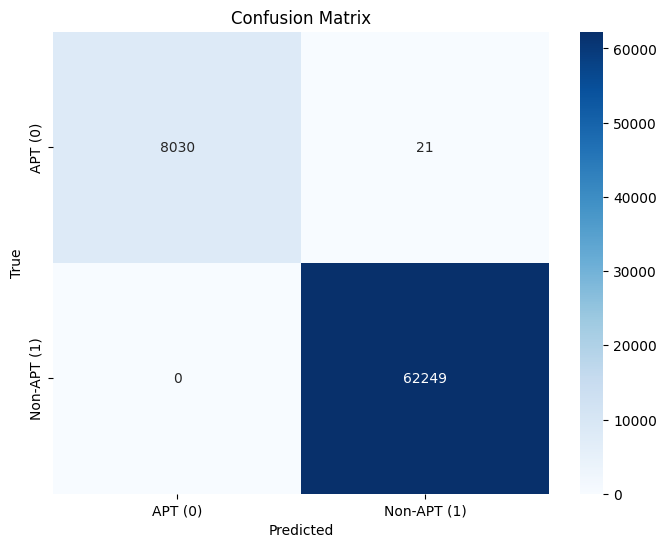

In [62]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'y_test' contains the true labels for the test data
# Ensure y_test is available; it should be the labels of your test dataset

# 1. Make Predictions
# Y_pred_lstm = model.predict(X_pred_lstm)
# Y_predicted_classes = (Y_pred_lstm > 0.5).astype(int).flatten()

# 2. Calculate Evaluation Metrics
accuracy = accuracy_score(Y_resampled_pred, Y_pred_binary )
precision = precision_score(Y_resampled_pred, Y_pred_binary )
recall = recall_score(Y_resampled_pred, Y_pred_binary )
f1 = f1_score(Y_resampled_pred, Y_pred_binary )
conf_matrix = confusion_matrix(Y_resampled_pred, Y_pred_binary )

# 3. Print Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Plot the confusion matrix for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=['APT (0)', 'Non-APT (1)'], yticklabels=['APT (0)', 'Non-APT (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Error Analysis

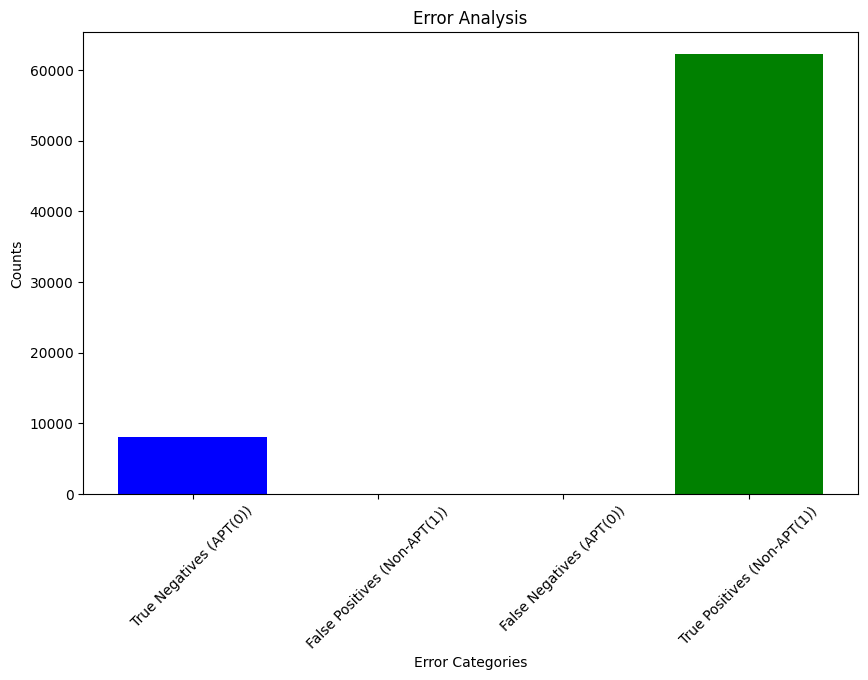

In [63]:
import matplotlib.pyplot as plt

# Define the labels
labels = ['True Negatives (APT(0))', 'False Positives (Non-APT(1))', 
          'False Negatives (APT(0))', 'True Positives (Non-APT(1))']

# Extract values from the confusion matrix
conf_matrix_values = [conf_matrix[0, 0], conf_matrix[0, 1], 
                      conf_matrix[1, 0], conf_matrix[1, 1]]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, conf_matrix_values, color=['blue', 'red', 'orange', 'green'])
plt.xlabel('Error Categories')
plt.ylabel('Counts')
plt.title('Error Analysis')
plt.xticks(rotation=45)
plt.show()


### Auc-Roc curve

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


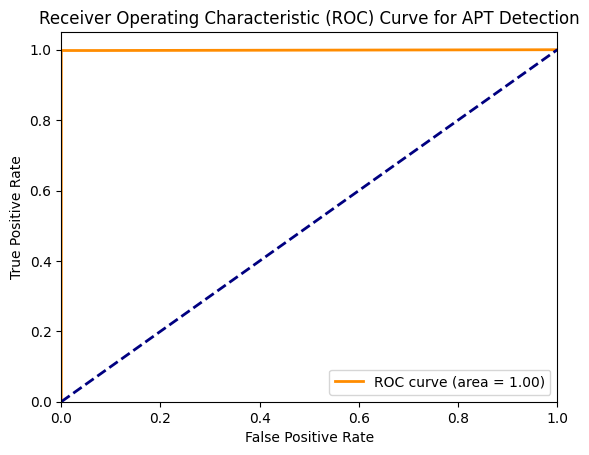

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Y_resampled_pred ===> Ground truth
# Y_pred_proba ===> Predicted probabilities

def plot_roc_curve(Y_resampled_pred, Y_pred_proba):
    # Swap the labels: treat '0' as positive class and '1' as negative class
    Y_resampled_pred_swapped = 1 - Y_resampled_pred
    Y_pred_proba_swapped = 1 - Y_pred_proba
    
    # Compute ROC curve and ROC area for the swapped labels
    fpr, tpr, _ = roc_curve(Y_resampled_pred_swapped, Y_pred_proba_swapped)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for APT Detection')
    plt.legend(loc="lower right")
    plt.show()

# Generate predictions
Y_pred_proba = best_model.predict(X_pred_lstm).ravel()
plot_roc_curve(Y_resampled_pred, Y_pred_proba)
